<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/computer_vision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

CNN o Convolutional Neural Networks son un tipo de red de neuronas que utiliza convoluciones para extraer características de una imagen o una señal (por ejemplo una serie temporal).

Tal y como hemos visto anteriormente la convolución tiene el potencial de extraer características de la entrada si se define correctamente el filtro de la convolución (en el caso de las imágenes) o una señal (en el caso de convoluciones 1d).

El uso de la convolución en este tipo de redes se ve sustentado por tres ideas principales:

- Las redes neuronales vanilla utilizan la multiplicación matricial para calcular interacciones entre cada peso en cada neurona con todas las entradas. Sin embargo una convolución es capaz de interactuar con decenas o cientos de píxeles a la vez mediante la ventana que deslizamos durante la convolución. Esto se traduce en que no es necesario almacenar un número tan elevado de parámetros ni ajustarlos lo que se traduce en un mejor rendimiento en cuanto a la memoria y al tiempo de computación.

- Los filtros calculados se deslizan a través de la imagen tratando de calcular la misma características en regiones diferentes de la misma. Si una característica útil se encuentra en un punto de la imagen, es posible que la misma característica puedad ser encontrada en otra región de la misma. Las redes convolucionales comparten parámetros de esta manera mientras que en una red vanilla cada peso interactúa de forma independiente con cada valor de la entrada una única vez.

- La propiedad descrita anteriormente (compartir parámetros) añade cierta tolerancia a la traslación de características dentro de una imagen.

Las redes convolucionales han demostrado un rendimiento muy alto en problemas de visión por computador siendo actualmente el estado del arte en este campo.

# Arquitectura tradicional de un modelo CNN

Generalmente cuando se diseñan arquitecturas con CNN se sigue el siguiente esquema:

- Bloque CNN+Pooling: En un primer instante se entrenan las capas convolucionales que suelen ir acompañadas de capas de pooling. Este primer bloque se centra en extraer características de la entrada.

- Flatten: Las salidas de la capa anterior son matrices de dos dimensiones. Debido a la arquitectura de estas redes (el final de la arquitectura suele ser una red neuronal tradicional), es necesario "aplanar" la información y convertirla en un vector de una única dimensión.

- Dense layers: Finalmente la arquitectura termina añadiendo una o más capas densas para procesar las características extraídas en el primer bloque.

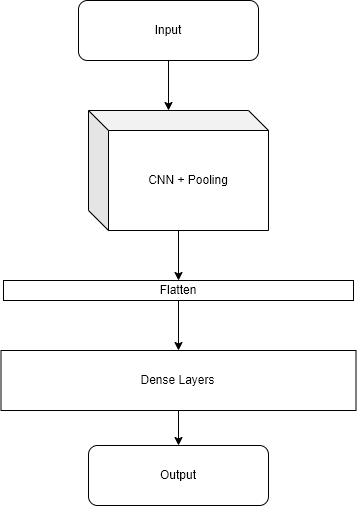

# El bloque convolucional

El bloque convolucional previamente descrito está formado por capas convolucionales y capas de pooling.

- Capa convolucional: Se entrena para extraer características de las entradas o las capas anteriores.

- Capa de pooling: Se utilizan para reducir la dimensionalidad mientras se mantiene la información de las activaciones más altas.

## La capa convolucional (1 Channel)

La capa convolucional está definida a través de filtros que realizarán convoluciones. Cada filtro hace de análogo con una neurona en una red neuronal vanilla y toman la forma de una matriz de pesos que se desliza sobre la entrada.
Para una matriz de dimensiones 3x3 la forma del filtro sería la siguiente:

\begin{matrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
w_{31} & w_{32} & w_{33}
\end{matrix}

Cada filtro definido se organiza en la capa como si se tratara de un cubo y recibe la misma entrada. Al organizar los filtros de forma paralela y con pesos independientes se consigue que cada capa convolucional pueda entrenar filtros que se especialicen en extraer diferentes características. 

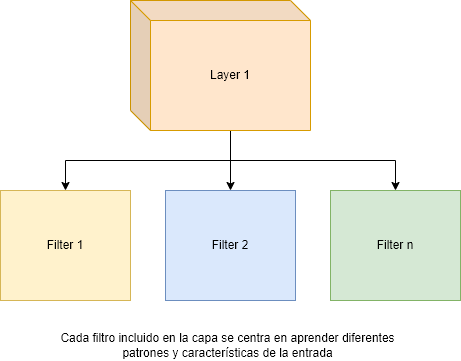

Es imposible que conocer que característica aprenderá cada filtro, sin embargo no es necesario, puesto que las características calculadas son fruto del entrenamiento con descenso por gradiente. Esto nos garantiza que las características extraídas de la imagen son las óptimas para nuestra tarea de aprendizaje.

Aunque no es posible conocer las características que se calcularán, sí que existe la intuición de que las características calculadas en las capas superiores de un modelo convolucional serán de carácter general (por ejemplo bordes y contornos) mientras que conforma se profundiza en las capas las características calculadas se centran en detalles particulares.



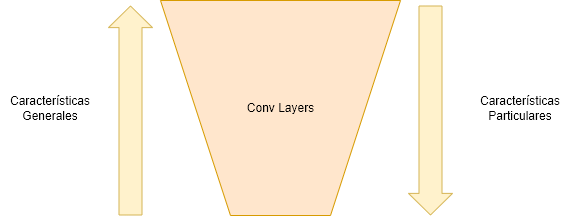

## Definir una capa convolucional en keras

Utilizando keras es posible definir una capa convolucional en un modelo. Para ello solo hay que seguir los siguientes pasos.

- Accedemos a la capa con keras.layers.Conv2D
- Definimos los siguientes parámetros
  - filters: Número de filtros que se van a incluir en esta capa
  - kernel_size: Tamaño del filtro. El tamaño del filtro definirá cuantos pesos se incluyen en cada filtro
  - strides: Velocidad de desplazamiento de la ventana
  - padding: Padding aplicado a la entrada. Valores permitidos "valid" y "same"
  - activation: Función de activación aplicada al filtro

In [ ]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [ ]:
# Ejemplo
cnn_layer = keras.layers.Conv2D(10, (3,3), padding="same", strides=(2,1))

# Análisis dimensional de la convolución

Como hemos estudiado, una convolución altera necesariamente las dimensiones de la entrada tras la operación. Los parámetros que controlan las dimensiones de salida son:

K (Kernel Size) - Tamaño del filtro que se va a utilizar durante la convolución.
P (Padding) - Número de filas o columnas de padding que se van a añadir.
S (Stride) - Velocidad de desplazamiento horizontal o vertical del filtro durante la convolución.

Para una dimensión de entrada $I_x$ la dimensión de salida $O_x$ se calcularía:

$O_x = \frac{I_x-K+2P}{S_x}+1$

Y para la dimensión vertical:

$O_y = \frac{I_y-K+2P}{S_y}+1$

In [ ]:
train, test = keras.datasets.mnist.load_data(path="mnist.npz")

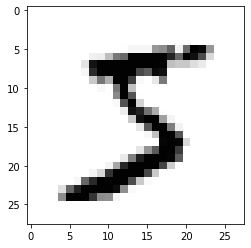

In [ ]:
plt.imshow(train[0][0], cmap="Greys")

In [ ]:
# Planteamos un modelo para analizar las salidas
# Dimension esperada (1, 26, 26, 1)
# Parámetros K = 3
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(1, kernel_size=(3,3), 
                                 input_shape=(28,28,1),
                                 padding="valid",
                                 data_format="channels_last")(input_layer)
model = keras.Model(inputs=input_layer, outputs=conv_layer)
model.compile()

In [ ]:
reshaped_sample = train[0][0].reshape(1,28,28,1)

In [ ]:
prediction = model.predict(reshaped_sample)

In [ ]:
prediction.shape

(1, 26, 26, 1)

In [ ]:
model.layers[1].weights[0].numpy().shape

(3, 3, 1, 1)

In [ ]:
# Planteamos un modelo para analizar las salidas
# Dimension esperada (1, 13, 26, 1)
# Parámetros K = 3, Sx = 2, Sy=1
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(1, kernel_size=(3,3), 
                                 input_shape=(28,28,1),
                                 strides=(2,1),
                                 padding="valid",
                                 data_format="channels_last")(input_layer)
model = keras.Model(inputs=input_layer, outputs=conv_layer)
model.compile()

In [ ]:
prediction = model.predict(reshaped_sample)
prediction.shape

(1, 13, 26, 1)

# Ejercicio

Plantead un modelo de Keras para obtener las siguientes dimensiones a la salida:

(1, 13, 13, 1)

(1, 24, 24, 1)

(1, 12, 24, 1)

(1, 28, 28, 1)

In [ ]:
# Escribid vuestro código aquí
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(1, kernel_size=(5,5), 
                                 input_shape=(28,28,1),
                                 strides=(1,1),
                                 padding="same",
                                 data_format="channels_last")(input_layer)
model = keras.Model(inputs=input_layer, outputs=conv_layer)
model.compile()

In [ ]:
prediction = model.predict(reshaped_sample)
prediction.shape

(1, 28, 28, 1)

# Capa Flatten en Keras

Aunque conceptualmente la arquitectura previa parece bastante clara a nivel operacional es necesario definir las operaciones vectoriales que se van a realizar durante el entrenamiento del modelo. 

Mientras que las operaciones de convolución son realizadas sobre matrices en dos dimensiones con las siguientes dimensiones:

$(n_{batch}, x, y, n_{channels})$

Las redes neuronales tradicionales esperan las siguientes dimensiones:

$(n_{batch}, n_{features})$

Para permitir que la información que se extrae de las capas convolucionales pueda pasar a una red neuronal vanilla reorganizaremos la información con la siguiente operación:

$n_{features} = x*y*n_{channels}$

La capa flatten de keras se encarga de realizar esta operación por nosotros.

In [ ]:
# Planteamos un modelo para analizar las salidas
# Dimensión esperada (1, 26, 26, 1)
# Parámetros K = 3
# Dimensión del flatten  (1, 676)
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(1, kernel_size=(3,3), 
                                 input_shape=(28,28,1),
                                 padding="valid",
                                 data_format="channels_last")(input_layer)
flat = keras.layers.Flatten(data_format="channels_last")(conv_layer)
model = keras.Model(inputs=input_layer, outputs=flat)
model.compile()

In [ ]:
prediction = model.predict(reshaped_sample)
prediction.shape

(1, 676)

# Ejercicio 

Añadid una capa flatten a los dos primeros modelos del ejercicio anterior y comprobad las dimensiones de salida

In [ ]:
# Escribid vuestro código aquí
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(1, kernel_size=(5,5), 
                                 input_shape=(28,28,1),
                                 strides=(2,1),
                                 padding="valid",
                                 data_format="channels_last")(input_layer)
flatten = keras.layers.Flatten(data_format="channels_last")(conv_layer)
model = keras.Model(inputs=input_layer, outputs=flatten)
model.compile()

In [ ]:
prediction = model.predict(reshaped_sample)
prediction.shape

(1, 288)

In [ ]:
(12*24)

288

# La capa de pooling

La idea de las capas de pooling es reducir la dimensión de entrada de la capa mientras se mantiene la información relevante y se descarta la información que no sea útil para la tarea. 

Es importante mencionar que en una red de neuronas la información útil es representada por las activaciones altas, en base a esto se proponen dos técnicas de pooling que se explicarán a continuación:

- Average Pooling: En el average pooling una ventana se desliza sobre todos los valores de la entrada y calcula la media



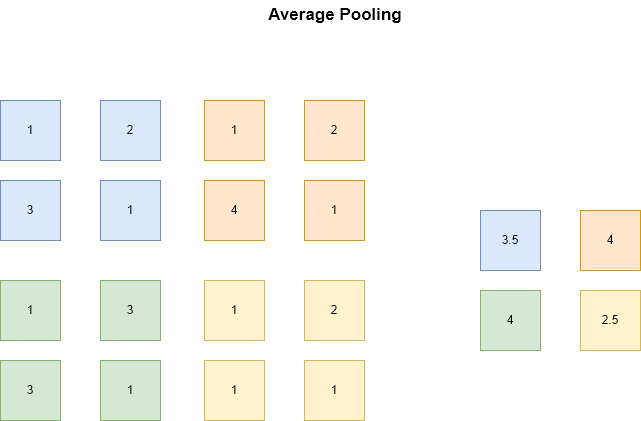

- Max Pooling: En el max pooling una ventana se desliza sobre todos los valores de la entrada y se queda únicamente con el valor máximo.

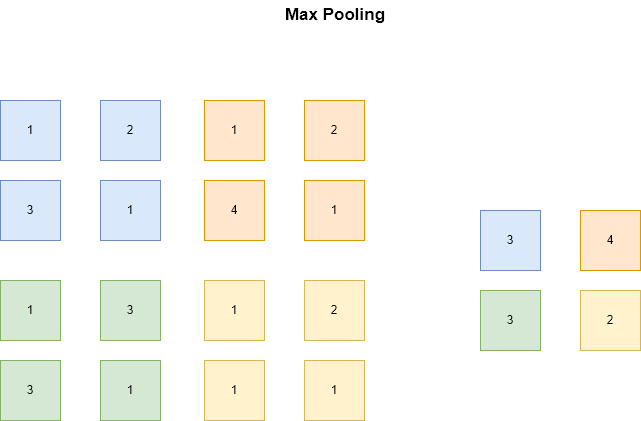

Al igual que en el caso anterior la dimensión de salida se calcula con la siguiente fórmula:

$O_x = \frac{I_x-K+2P}{S_x}+1$

Y para la dimensión vertical:

$O_y = \frac{I_y-K+2P}{S_y}+1$

## Definir una capa de pooling en keras

Las capas de pooling en keras (descritas anteriormente) se encuentran almacenadas en las clases:

- keras.layers.AveragePooling2D
- keras.layers.MaxPooling2D

Los parámetros que se necesitan definir son:

  - pool_size: Tamaño del filtro. El tamaño del filtro definirá cuantos pesos se incluyen en cada filtro
  - strides: Velocidad de desplazamiento de la ventana
  - padding: Padding aplicado a la entrada. Valores permitidos "valid" y "same"

In [ ]:
# Planteamos un modelo para analizar las salidas
# Dimension esperada (1, 26, 26, 1)
# Parámetros K = 3
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(1, kernel_size=(3,3), 
                                 input_shape=(28,28,1),
                                 activation="relu",
                                 padding="valid",
                                 data_format="channels_last")(input_layer)
pooling = keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1))(conv_layer)
model = keras.Model(inputs=input_layer, outputs=pooling)
model.compile()

In [ ]:
model.predict(reshaped_sample).shape

(1, 25, 25, 1)

# Ejercicio

Construid dos modelos con una capa convolucional seguido de una capa de pooling (un modelo con max pooling y un modelo con average pooling) y comprobad las dimensiones a la salida para los siguientes parámetros:

- padding = "valid", pool_size = (2,2) y stride=(1,1)

In [ ]:
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(1, kernel_size=(3,3), 
                                 input_shape=(28,28,1),
                                 activation="relu",
                                 padding="valid",
                                 data_format="channels_last")(input_layer)
pooling = keras.layers.AveragePooling2D(pool_size=(2,2), strides=(1,1))(conv_layer)
model = keras.Model(inputs=input_layer, outputs=pooling)
model.compile()
model.predict(reshaped_sample).shape

(1, 25, 25, 1)

# Activaciones en CNN

Finalmente para terminar de comprender como funcionan las redes CNN estudiaremos como se realizan las activaciones en cada uno de los filtros. Primero comencemos estudiando el número de parámetros que habrá en una capa convolucional:

$parameters = (w*h*d)*k$

Y si añadimos bias:

$parameters = (w*h*d+1)*k$

Siendo:

- w: Tamaño horizontal de los filtros
- h = Tamaño vertical de los filtros
- d = Profundidad de la entrada. En el caso de una imagen rgb este número es 3 (número de canales que definen la imagen) en el caso de usar la salida de una capa convolucional previa es igual al número de filtros definidos en la capa previa.
- k = Número de filtros definidos en la capa actual.

Las activaciones se realizan elemento a elemento sobre las salidas obtenidas de cada operación realizada por el filtro:

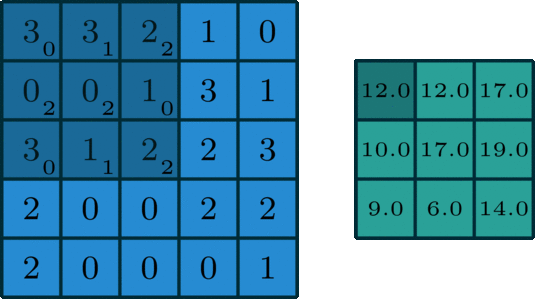

Según la salida descrita en la imagen la activación para el resultado sería:

\begin{matrix}
relu(12)&relu(12)&relu(17) \\
relu(10)&relu(17)&relu(19) \\
relu(9)&relu(6)&relu(14)
\end{matrix}

Y si añadimos bias:

\begin{matrix}
relu(12+b)&relu(12+b)&relu(17+b) \\
relu(10+b)&relu(17+b)&relu(19+b) \\
relu(9+b)&relu(6+b)&relu(14+b)
\end{matrix}

# Ejercicio

Construid la arquitectura previamente descrita utilizando la api funcional de Keras. Entrenad un clasificador sobre el dataset de mnist numbers: https://keras.io/api/datasets/mnist/

Comprobad que el número de parámetros se corresponde con la fórmula descrita anteriormente.

In [ ]:
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(24, kernel_size=(3,3), 
                                 input_shape=(28,28,1),
                                 activation="relu",
                                 padding="same",
                                 data_format="channels_last")(input_layer)
conv_layer_2 = keras.layers.Conv2D(24, kernel_size=(3,3),
                                   activation="relu",
                                   padding="same",
                                   data_format="channels_last")(conv_layer)
pooling = keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv_layer_2)
flatten = keras.layers.Flatten(data_format="channels_last")(pooling)
dense = keras.layers.Dense(150, activation="tanh")(flatten)
softmax = keras.layers.Dense(10, activation="softmax")(dense)
model = keras.Model(inputs=input_layer, outputs=softmax)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="categorical_accuracy")

In [ ]:
import pandas as pd

In [ ]:
# Escribid vuestro código aquí
train, test = keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
X_train = train[0].reshape(60000,28,28,1)
Y_train = pd.get_dummies(train[1])
X_test = test[0].reshape(10000,28,28,1)
Y_test = pd.get_dummies(test[1])

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),batch_size=32, epochs=1)

 106/1875 [>.............................] - ETA: 1:49 - loss: 0.4799 - categorical_accuracy: 0.8670

KeyboardInterrupt: ignored

# Redes Convolucionales con imágenes RGB

Cuando trabajamos con imágenes a color la entrada pasa de ser una única matriz a un tensor que representa a la imagen a través de 3 canales (rojo, verde y azul)

La principal particularidad de esto es que cambia tanto las dimensiones de entrada como el número de parámetros en cada capa.

Esto se debe a que el conjunto de pesos de cada filtro cambia para cada entrada. Es decir, los pesos de cada filtro serán diferentes para cada uno de los canales.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = Image.open("cats_and_dogs_filtered/train/cats/cat.10.jpg")
array_image = np.array(img)
array_image.shape

(499, 489, 3)

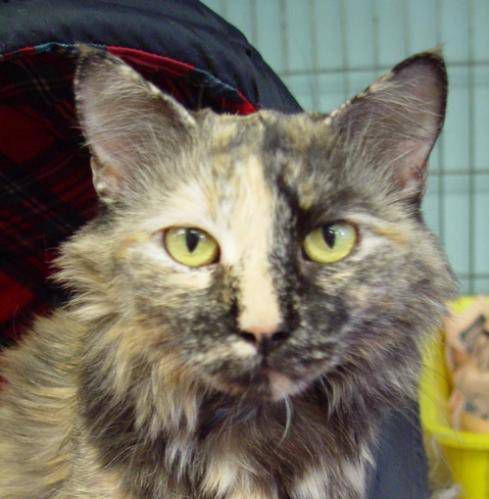

In [ ]:
img

In [ ]:
input_layer = keras.layers.Input(shape=(499,489,3))
conv_layer = keras.layers.Conv2D(1, kernel_size=(3,3), 
                                 input_shape=(499,489,3),
                                 activation="relu",
                                 padding="valid",
                                 data_format="channels_last")(input_layer)
pooling = keras.layers.MaxPooling2D(pool_size=(2,2))
model = keras.Model(inputs=input_layer, outputs=conv_layer)
model.compile()

In [ ]:
reshaped_image = array_image.reshape(1,499,489,3)
prediction = model.predict(reshaped_image)

In [ ]:
prediction.shape

(1, 497, 487, 1)

In [ ]:
# Se puede apreciar en los pesos de la capa
# Que ahora la dimensión 2 es ahora 3 en los pesos
model.layers[1].weights[0].numpy().shape

(3, 3, 3, 1)

# Ejercicio

Cargad una imagen del dataset de gatos y perror, comprobad su resolución y plantead un modelo que pueda ejecutarse para las dimensiones de entrada.

En el modelo incluíd una capa convolucional con 5 filtros, stride_x = 2, stride_y = 1 y kernel_size = (5,5)

Realizad análisis dimensional para comprobar si los pesos tienen las dimensiones apropiadas y si la salida tiene las dimensiones esperadas.

# Image Preprocessing

Como se puede apreciar con el dataset anterior todas las imágenes de tienen resoluciones diferentes a la entrada. Para solucionar este problema es necesario cambiar las resoluciones de las imágenes de entrada para que todas tengan la misma forma.

Este problema no es trivial y dependiendo del dataset puede ser muy complejo plantear el preprocesado de datos para que las imágenes sigan siendo coherentes.

Para solventar este problema en esta clase vamos a estudiar las técnicas de cambio de resolución, recortado y padding.

- Cambio de resolución: Se altera el tamaño de la imagen intentando mantener la coherencia de los puntos y como están distribuídos.

In [ ]:
img = Image.open("cats_and_dogs_filtered/train/cats/cat.2.jpg")
img.size

(312, 396)

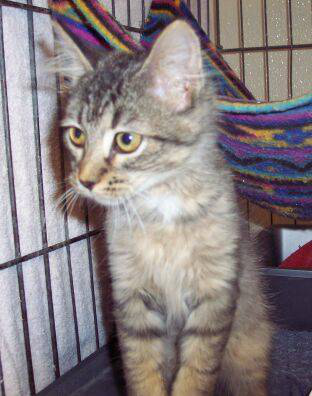

In [ ]:
img

In [ ]:
resized_img = img.resize((128,128))

In [ ]:
resized_img.size

(128, 128)

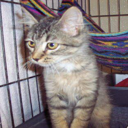

In [ ]:
resized_img

- Recortado (Cropping): Hablamos de recortado cuando eliminamos un fragmento de la imagen.

In [ ]:
# Ejemplo de recortado desde el centro
# El objetivo es conseguir una imagen de 128 por 128
img = Image.open("cats_and_dogs_filtered/train/cats/cat.2.jpg")
width, height = img.size
center_height = round(height/2)
center_width = round(width/2)
print(center_height, center_width)

198 156


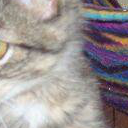

In [ ]:
left = 198-64
top = 156-64
right = 198+64
bottom = 156+64
cropped_img = img.crop(box=(left, top, right, bottom))
cropped_img

In [ ]:
cropped_img.size

(128, 128)

- Padding: Ya hemos estudiado el padding previamente. Sin embargo, es posible también añadir filas y columnas nulas para compensar la falta de tamaño en una imagen pequeña.

In [ ]:
# Ejemplo de padding sobre la imagen anterior
# Objetivo imagen 130x130
array = np.array(cropped_img)
padded_image = np.pad(array, ((1,1),(1,1),(0,0)))
padded_image.shape

(130, 130, 3)

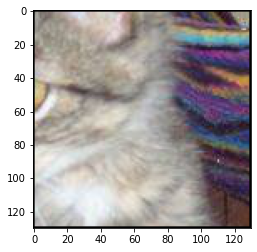

In [ ]:
plt.imshow(padded_image)

## Una estrategia para preprocesar imágenes

Es posible que tras estudiar estos métodos de preprocesado surja la preocupación de como aplicarles. Es posible que tras recortar y alterar las resoluciones la imagen resultante no conserve ni las estructuras ni el contenido de la imagen original.

Para solventar este problema es necesario aplicar los métodos estudiados de forma inteligente y obtener un resultado que sea representativo de la imagen original.

Para solventar este problema os propongo la siguiente estrategia:

- Aplicad un cambio de resolución manteniendo la relación de aspecto
- Aplicad padding sobre la dimensión de menor tamaño para obtener una imagen cuadrada

In [ ]:
# Ejemplo del pipeline
img = Image.open("cats_and_dogs_filtered/train/cats/cat.2.jpg")
width, height = img.size

In [ ]:
aspect_relatio = height/width
aspect_relatio

1.2692307692307692

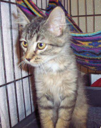

In [ ]:
# Definid siempre la dimensión deseada en la dimensión de mayor tamaño
new_height = 128
new_width = round(128/aspect_relatio)
resized_img = img.resize((new_width,new_height))
resized_img

In [ ]:
resized_img.size

(101, 128)

In [ ]:
array = np.array(resized_img)
padded_image = np.pad(array, ((0,0),(13,14),(0,0)))
padded_image.shape

(128, 128, 3)

In [ ]:
128-101

27

In [ ]:
27/2

13.5

In [ ]:
np.ceil(13.5)

14.0

In [ ]:
np.floor(13.5)

13.0

In [ ]:
padded_image.shape

(128, 128, 3)

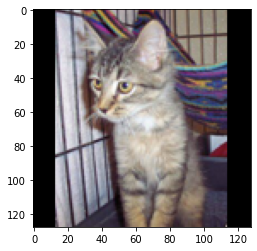

In [ ]:
plt.imshow(padded_image)

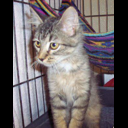

In [ ]:
# Convertir array a imagen
img_padded = Image.fromarray(padded_image)
img_padded

In [ ]:
# Guardar imagen
img_padded.save("padded_image.jpeg")

# Ejercicio

Preprocesad 100 imágenes de gatos y 100 imágenes de perros para que todas tengan resolución de 64x64 utilizando el pipeline descrito anteriormente.

Comprobad que ninguna imagen de las generadas tenga una resolución diferente a la deseada.

In [ ]:
import os

In [ ]:
cat_files = os.listdir("cats_and_dogs_filtered/train/cats")[0:100]
dog_files = os.listdir("cats_and_dogs_filtered/train/dogs")[0:100]

In [ ]:
def change_resolution(img, desired_resolution):
  width, height = img.size
  if width > height:
    aspect_relatio = width/height
    new_width = desired_resolution
    new_height = round(desired_resolution/aspect_relatio)
    resized_img = img.resize((new_width,new_height))
  else:
    aspect_relatio = height/width
    new_height = desired_resolution
    new_width = round(desired_resolution/aspect_relatio)
    resized_img = img.resize((new_width,new_height))
  return resized_img

def pad_img(img, desired_resolution):
  width, height = img.size
  array = np.array(img)
  if width > height:
    total_pad = desired_resolution - height
    pad = total_pad/2
    if isinstance(pad, float):
      pad_0 = int(np.ceil(pad))
      pad_1 = int(np.floor(pad))
      padded_image = np.pad(array, ((pad_0, pad_1),(0,0),(0,0)))
    else:
      padded_image = np.pad(array, ((pad, pad),(0,0),(0,0)))
  else:
    total_pad = desired_resolution - width
    pad = total_pad/2
    if isinstance(pad, float):
      pad_0 = int(np.ceil(pad))
      pad_1 = int(np.floor(pad))
      padded_image = np.pad(array, ((0,0),(pad_0, pad_1),(0,0)))
    else:
      padded_image = np.pad(array, ((0,0),(pad, pad),(0,0)))
  return padded_image

In [ ]:
for file_ in cat_files:
  path = os.path.join("cats_and_dogs_filtered/train/cats", file_)
  img = Image.open(path)
  resized_img = change_resolution(img, 64)
  padded_img = pad_img(resized_img, 64)
  print(padded_img.shape)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Data Augmentation

Siguiendo en las líneas del preprocesado es posible operar con las imágenes para conseguir que el algoritmo se haga robusto a giros, traslaciones y ruído.

La aumentación de datos permite que un algoritmo realice su tarea de aprendizaje correctamente aunque se produzcan cambios como los representados a continuación.


In [ ]:
from PIL import ImageFilter

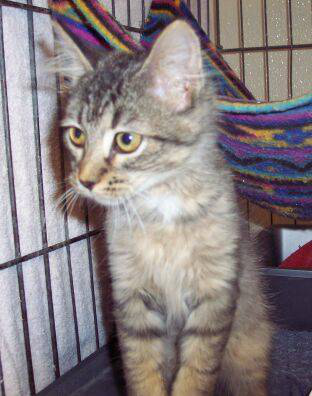

In [ ]:
img = Image.open("cats_and_dogs_filtered/train/cats/cat.2.jpg")
img

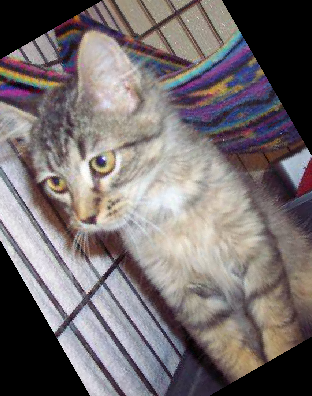

In [ ]:
img.rotate(30)

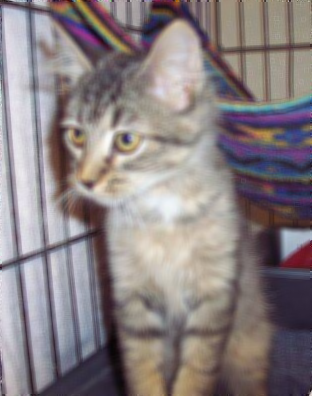

In [ ]:
img.filter(ImageFilter.BLUR)

Es importante matizar que añadir este tipo de aumentación permite al algoritmo a hacerse más robusto a las transformaciones realizadas. Por ejemplo, si una cámara cambia el ángulo y comienza a grabar imágenes con una rotación el algoritmo estará preparado para operar en esa situación. Con el filtro de blur hemos simulado una imagen borrosa, la cámara podría operar si la lente se ensuciara y ciertas partes de la imagen se encontraran emborronadas.

Con esto en mente, lo que nunca permitirá la aumentación de datos es que construir un algoritmo que pueda predecir muestras que no ha captado en el set de entrenamiento. Por ejemplo, si de repente aparece un gato con 6 patas y ojos en la espalda, por mucho que añadamos aumentación de datos nuestro algoritmo no posee un ejemplar con dichas características en el dataset de entrenamiento y por lo tanto no realizará una predicción correcta de ese extraño animal.

Además, es importante cuestionarse si tiene sentido aplicar aumentación de datos sobre los sets de test y validación. Si bien esto nos permitirá evaluar como funcionará nuestro algoritmo con las nuevas muestras, también estamos añadiendo muestras sintéticas al conjunto de test y validación. Puede ser interesante poseer conjuntos de validación en los que no se incluyan las muestras generadas por aumentación para conocer como funcionará el algoritmo con el conjunto de datos original tras el entrenamiento.

## Data Leaking Producido en Data Augmentation

Al realizar la aumentación de datos estamos generando nuevas imágenes que se incluirán en el entrenamiento, en test y en validación. Sin embargo un error común es realizar la aumentación de datos sobre un conjunto de datos completo y tras esto dividirlo en train, test y validation.

Esto puede conllevar a que muestras aumentadas del conjunto de entrenamiento terminen en test y validación, filtrándose muestras utilizadas durante el entrenamiento en el paso de evaluación.

Para evitar esto es importante que siempre dividáis los datasets al inicio del ejercicio y una vez divididos realicéis las aumentaciones que consideréis oportunas.

#Keras Generators

Los generadores de Keras son una clase incluída en el framework que permite realizar operaciones sobre el conjunto de datos mientras se cargan al modelo para el entrenamiento o la inferencia.

Un generador permite, por ejemplo, incluir en un único pipeline todos los pasos de preprocesado y aumentación de datos que se realicen sobre un conjunto de imágenes.

Keras incluye ya algunos tipos de generadores previamente construídos en la librería, por ejemplo el siguiente generador nos permite añadir aumentación de datos y cargar todas las imágenes de una carpeta.

In [ ]:
generator = keras.preprocessing.image_dataset_from_directory("cats_and_dogs_filtered/train")

Found 2000 files belonging to 2 classes.


El generador previo permite definir ciertos parámetros:

- color_mode: Espacio de color en el que están guardadas las imágenes. Por defecto es "rgb".

- batch_size: Tamaño del batch de las imágenes a cargar.

- image_size: Tamaño de la imagen al que se transformarán las imágenes de entrada.

- crop_to_aspect_ratio: True or False. Cuando se define como True recorta la imagen al cambiar su resolución para mantener el ratio de aspecto. No tiene porque incluír en la imagen el area deseada.

# Aumentación con Keras

Aparte del generador anterior, keras incluye capas que permiten realizar aumentación de datos sobre las imágenes mientras se cargan en el modelo.

In [ ]:
# A esta capa es necesario pasarle el ángulo en radianes en radianes
angle = (2*3.1416*30)/360
keras_rotation_layer = keras.layers.RandomRotation(factor=(-angle, angle))

# Ejercicio

Construid un datagenerator con keras que os permita cargar las imágenes del conjunto de datos de perros y gatos y realizar un entrenamiento con él sobre un modelo de redes convolucionales.

Definid el modelo con una capa de rotación, una capa convolucional, una capa de pooling, una cappa flatten y una capa densa conectada a un clasificador softmax.

# Normalización de imágenes

La normalización a la entrada de las imágenes es muy sencilla. Aplicando min-max normalization la fórmula resultante es la siguiente:

$X_{norm} = \frac{X-min}{max-min}$

$X_{norm} = \frac{X-0}{255-0}$

Debido a que los valores máximos y mínimos de un pixel son 255 y 0 respectivamente tan solo es necesario dividir entre 255.

# Visualización de un feature map

Los resultados de las sucesivas convoluciones que se hacen en las arquitecturas convolucionales son conocidos como feature maps (mapas de características).

Visualizar un feature map es muy sencillo, tan solo necesitáis extraer el resultado intermedio de un modelo y visualizarlo.

# Ejercicio

Entrenad un modelo con el dataset de mnist que incluya al menos dos capas convolucionales y visualizad uno de sus feature maps.

In [1]:
train, test = keras.datasets.mnist.load_data(path="mnist.npz")

NameError: ignored